In [22]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
import dask.dataframe as dd

In [265]:
df = pd.read_csv('LION_PressureTags_2018_01_01_to_2018_01_31.csv', sep = '\t')

In [266]:
df.head()

,last_active_time,activePod,rig_id,Blue,Yellow,Active,BlueSem,YellowSem,LA Open Current,LA Close SC,...,YellowFlowIndx,Pod1 Total1,Pod1 Total2,Pod2 Total1,Pod2 Total2,user_entered_reference_pres_podtrans_pod_1_sema,user_entered_reference_pres_podtrans,user_entered_reference_pres_podtrans_pod_2_sema,pod_2_adj,pod_1_adj
0,2018-01-01 00:00:04,2,LION,1,2,2,4,2,232,0,...,17,0.0,253.899994,0.0,516.539978,-2000,-2000,-2000,1476.719971,1544.319946
1,2018-01-01 00:00:09,2,LION,1,2,2,4,2,232,0,...,17,0.0,253.899994,0.0,516.539978,-2000,-2000,-2000,1476.719971,1544.319946
2,2018-01-01 00:00:14,2,LION,1,2,2,4,2,232,0,...,17,0.0,253.899994,0.0,516.539978,-2000,-2000,-2000,1476.719971,1544.319946
3,2018-01-01 00:00:23,2,LION,1,2,2,4,2,232,0,...,17,0.0,253.899994,0.0,516.539978,-2000,-2000,-2000,1476.719971,1544.319946
4,2018-01-01 00:00:24,2,LION,1,2,2,4,2,232,0,...,17,0.0,253.899994,0.0,516.539978,-2000,-2000,-2000,1476.719971,1544.319946


In [267]:
print(len(df))

502637


In [268]:
len(df.columns)

43

In [238]:
#df1 = pd.read_csv("MAERSK_Annular_2017_02_26_to_2017_06_19.csv", sep = '\t')

In [239]:
#df1 = pd.read_csv("LION_PressureTags_2017_04_24_to_2017_08_07.csv", sep='\t')

In [269]:
df['last_active_time'] = pd.to_datetime(df['last_active_time'])

In [270]:
df.head()

,last_active_time,activePod,rig_id,Blue,Yellow,Active,BlueSem,YellowSem,LA Open Current,LA Close SC,...,YellowFlowIndx,Pod1 Total1,Pod1 Total2,Pod2 Total1,Pod2 Total2,user_entered_reference_pres_podtrans_pod_1_sema,user_entered_reference_pres_podtrans,user_entered_reference_pres_podtrans_pod_2_sema,pod_2_adj,pod_1_adj
0,2018-01-01 00:00:04,2,LION,1,2,2,4,2,232,0,...,17,0.0,253.899994,0.0,516.539978,-2000,-2000,-2000,1476.719971,1544.319946
1,2018-01-01 00:00:09,2,LION,1,2,2,4,2,232,0,...,17,0.0,253.899994,0.0,516.539978,-2000,-2000,-2000,1476.719971,1544.319946
2,2018-01-01 00:00:14,2,LION,1,2,2,4,2,232,0,...,17,0.0,253.899994,0.0,516.539978,-2000,-2000,-2000,1476.719971,1544.319946
3,2018-01-01 00:00:23,2,LION,1,2,2,4,2,232,0,...,17,0.0,253.899994,0.0,516.539978,-2000,-2000,-2000,1476.719971,1544.319946
4,2018-01-01 00:00:24,2,LION,1,2,2,4,2,232,0,...,17,0.0,253.899994,0.0,516.539978,-2000,-2000,-2000,1476.719971,1544.319946


In [271]:
list(df.columns.values)

['last_active_time',
 'activePod',
 'rig_id',
 'Blue',
 'Yellow',
 'Active',
 'BlueSem',
 'YellowSem',
 'LA Open Current',
 'LA Close SC',
 'LA Close SFS',
 'LA Open SFS',
 'LA Open SOC',
 'LA Close SOC',
 'Blue Adj Ref',
 'Yellow Adj Ref',
 'BLUE ADJ',
 'YELLOW ADJ',
 'LA RegRdbakPes 1/A',
 'LA RegRdbakPes 1/B',
 'LA RegRdbakPes 2/A',
 'LA RegRdbakPes 2/B',
 'LA RegRdbakPes',
 'LA RegPilotPes',
 'UA RegPilotPes',
 'UA RegRdbakPes',
 'pod_pilot_pres_podtrans',
 'pod_supply_pres_podtrans',
 'lower_ann_open_current',
 'lower_ann_close_current',
 'upper_ann_open_current',
 'upper_ann_close_current',
 'BlueFlowIndx',
 'YellowFlowIndx',
 'Pod1 Total1',
 'Pod1 Total2',
 'Pod2 Total1',
 'Pod2 Total2',
 'user_entered_reference_pres_podtrans_pod_1_sema',
 'user_entered_reference_pres_podtrans',
 'user_entered_reference_pres_podtrans_pod_2_sema',
 'pod_2_adj',
 'pod_1_adj']

In [243]:
## Selected Columns:
# 'last_active_time','UA RegPilotPes', 'UA RegRdbakPes', 'pod_pilot_pres_podtrans', 'pod_supply_pres_podtrans',
# 'upper_ann_open_current', 'upper_ann_close_current', 'pod_2_adj', 'pod_1_adj'

In [272]:
df_temp = df[['last_active_time','UA RegPilotPes', 'UA RegRdbakPes', 'pod_pilot_pres_podtrans', 'pod_supply_pres_podtrans',
                'upper_ann_open_current', 'upper_ann_close_current', 'pod_2_adj', 'pod_1_adj','Active']]

In [273]:
#df2.head()

In [274]:
temp = df_temp.describe()

In [275]:
temp

,UA RegPilotPes,UA RegRdbakPes,pod_pilot_pres_podtrans,pod_supply_pres_podtrans,upper_ann_open_current,upper_ann_close_current,pod_2_adj,pod_1_adj,Active
count,502637.000000,502637.000000,502637.000000,502637.000000,502637.0,502637.0,502637.000000,502637.000000,502637.000000
mean,2898.216302,2629.647103,4526.756155,4311.154751,241.0,0.0,1471.812338,1522.420170,1.511584
std,263.595148,476.745897,171.211613,349.230937,0.0,0.0,51.292416,57.671665,0.499866
min,1985.920044,1151.319946,3797.649902,2162.159912,241.0,0.0,682.380005,678.669983,1.000000
25%,2829.129883,2584.639893,4396.770020,4081.250000,241.0,0.0,1476.719971,1516.989990,1.000000
50%,2955.179932,2812.500000,4409.200195,4314.209961,241.0,0.0,1476.719971,1516.989990,2.000000
75%,3098.959961,2890.620117,4714.080078,4618.750000,241.0,0.0,1476.719971,1544.319946,2.000000
max,3732.489990,3685.639893,4794.720215,4775.000000,241.0,0.0,1519.849976,1544.319946,2.000000


In [248]:
#stat_summary

In [276]:
df_temp['UA RegPilotPes_adj'] = np.where(df_temp['Active'] == 1, df_temp['UA RegPilotPes']- df_temp['pod_1_adj'],df_temp['UA RegPilotPes']- df_temp['pod_2_adj'])

C:\Users\1535980\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [277]:
df_temp['UA RegRdbakPes_adj'] = np.where(df_temp['Active'] == 1, df_temp['UA RegRdbakPes']- df_temp['pod_1_adj'],df_temp['UA RegRdbakPes']- df_temp['pod_2_adj']) 

C:\Users\1535980\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [278]:
df_temp['pod_pilot_pres_podtrans_adj'] = np.where(df_temp['Active'] == 1, df_temp['pod_pilot_pres_podtrans']- df_temp['pod_1_adj'],df_temp['pod_pilot_pres_podtrans']- df_temp['pod_2_adj']) 

C:\Users\1535980\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [279]:
df_temp['pod_supply_pres_podtrans_adj'] = np.where(df_temp['Active'] == 1, df_temp['pod_supply_pres_podtrans']- df_temp['pod_1_adj'],df_temp['pod_supply_pres_podtrans']- df_temp['pod_2_adj']) 

C:\Users\1535980\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [280]:
df_temp[['UA RegPilotPes_adj', 'UA RegRdbakPes_adj', 'pod_pilot_pres_podtrans_adj', 'pod_supply_pres_podtrans_adj', 'upper_ann_open_current', 'upper_ann_close_current']].describe()

,UA RegPilotPes_adj,UA RegRdbakPes_adj,pod_pilot_pres_podtrans_adj,pod_supply_pres_podtrans_adj,upper_ann_open_current,upper_ann_close_current
count,502637.000000,502637.000000,502637.000000,502637.000000,502637.0,502637.0
mean,1406.615833,1138.046634,3035.155686,2819.554282,241.0,0.0
std,251.097687,469.932239,184.946703,356.342043,0.0,0.0
min,509.200073,-365.670044,2716.829834,645.169922,241.0,0.0
25%,1359.409912,1087.959961,2879.780029,2591.489990,241.0,0.0
50%,1478.459961,1315.040039,2899.500244,2823.280029,241.0,0.0
75%,1581.969971,1380.149902,3237.360107,3110.780029,241.0,0.0
max,2255.770020,2208.919922,3528.080200,3353.060059,241.0,0.0


In [281]:
temp = df_temp[['UA RegPilotPes_adj', 'UA RegRdbakPes_adj', 'pod_pilot_pres_podtrans_adj', 'pod_supply_pres_podtrans_adj', 'upper_ann_open_current', 'upper_ann_close_current']].describe()

In [282]:
temp.to_excel("summary_2017_01_01_to_2017_01_31.xlsx")

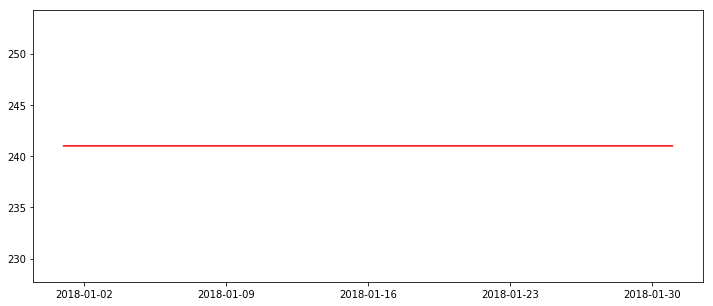

In [283]:
plt.figure(figsize=(12,5))
plt.plot(df_temp.last_active_time,df_temp.upper_ann_open_current, color = 'red')

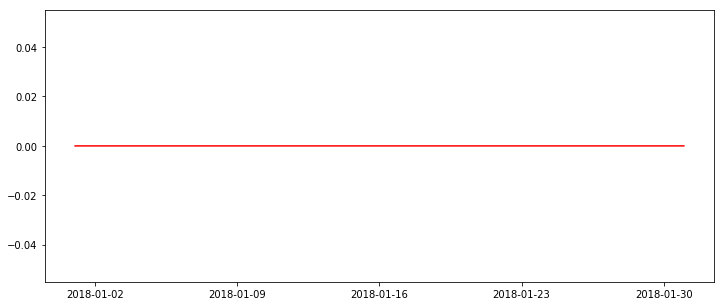

In [284]:
plt.figure(figsize=(12,5))
plt.plot(df_temp.last_active_time, df_temp.upper_ann_close_current, color = 'red')

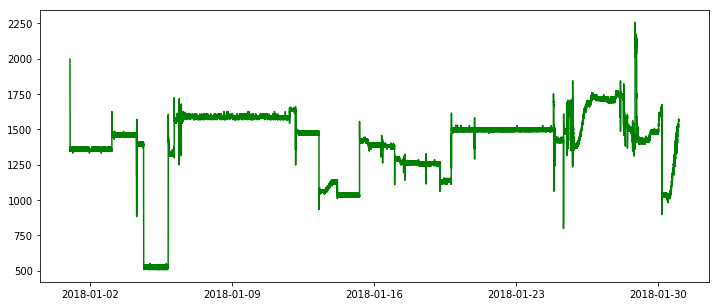

In [285]:
plt.figure(figsize=(12,5))
plt.plot(df_temp.last_active_time, df_temp[['UA RegPilotPes_adj']], color = 'green')

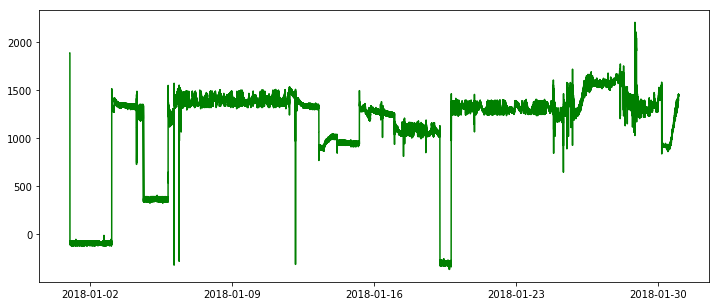

In [286]:
plt.figure(figsize=(12,5))
plt.plot(df_temp.last_active_time, df_temp[['UA RegRdbakPes_adj']], color = 'green')

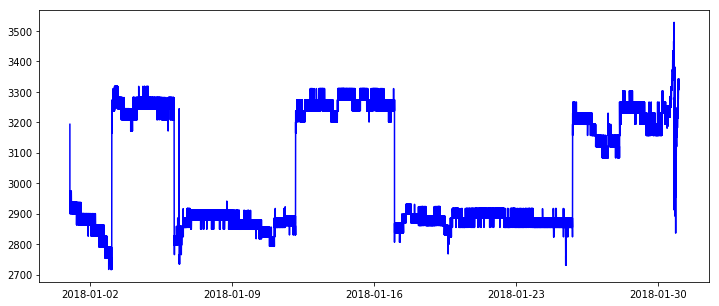

In [287]:
plt.figure(figsize=(12,5))
plt.plot(df_temp.last_active_time, df_temp[['pod_pilot_pres_podtrans_adj']], color = 'blue')

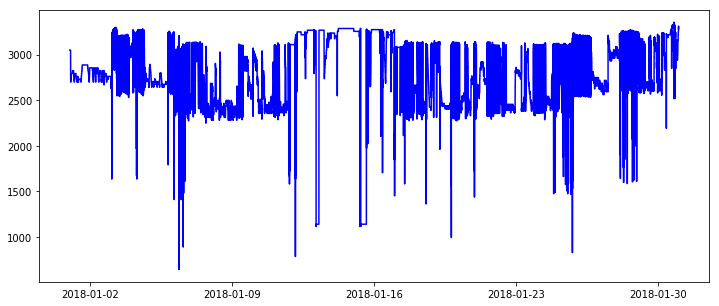

In [288]:
plt.figure(figsize=(12,5))
plt.plot(df_temp.last_active_time, df_temp[['pod_supply_pres_podtrans_adj']], color = 'blue')

In [289]:
plt.figure(figsize=(12,5))
plt.plot(df1[['pod_1_adj']], color = 'blue')

NameError: name 'df1' is not defined

In [24]:
#Write both MAERSK fiels in a xls file for Tableau and reuse
df2_temp.to_excel("MAERSK_Annular_2017_06_19_to_2018_03_31_v1.xlsx", sheet_name='Sheet_name_1')

NameError: name 'df2_temp' is not defined